In [1]:
from torch.utils.data.sampler import SubsetRandomSampler
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
from torchvision import datasets, transforms, utils
from torch.utils.data.sampler import SubsetRandomSampler
from torch.nn import functional as F
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
val_loss = [0.0693, 0.0565, 0.0575, 0.0598, 0.0582,
            0.0631, 0.0557, 0.0532, 0.0674, 0.0531,
            0.0581, 0.0576, 0.0585, 0.0809, 0.0676, 
            0.0513, 0.0631, 0.0547, 0.0565, 0.0620, 
            0.0614, 0.0784, 0.0636, 0.0529, 0.0722,
            0.0500, 0.0562, 0.0803, 0.0616, 0.0781,
            0.0822, 0.0706, 0.0650, 0.0674, 0.0640,
            0.0704, 0.0483, 0.0824, 0.0899, 0.0810,
            0.0519, 0.0687, 0.0721, 0.0530, 0.0831,
            0.0486, 0.0591, 0.0561, 0.0641, 0.0839,
            0.0551, 0.0568, 0.1430, 0.1111, 0.0486,
            0.0935, 0.0540, 0.0683, 0.0708, 0.0785
           ]

In [25]:
vgg11 = torch.load('data_for_report/val_vgg11bnlr001.pt')
vgglr01 = torch.load('data_for_report/val_vgg11bnlr01.pt')

{'batch_loss_vgg11bn': [[1.8855335712432861,
   0.7586329579353333,
   0.9754786491394043,
   0.7105786204338074,
   0.5146743059158325,
   0.41195839643478394,
   0.28787678480148315,
   0.5211083889007568,
   0.24360643327236176,
   0.7390956282615662,
   0.27840545773506165,
   0.29911690950393677,
   0.5966538786888123,
   0.3886498510837555,
   0.34730297327041626,
   0.5238115787506104,
   0.25979697704315186,
   0.39270249009132385,
   0.22105498611927032,
   0.2424202561378479,
   0.2479470670223236,
   0.2586766481399536,
   0.32273635268211365,
   0.4287187159061432,
   0.2984641492366791,
   0.2562694847583771,
   0.19962705671787262,
   0.16805949807167053,
   0.2427264004945755,
   0.6281715631484985,
   0.2529429495334625,
   1.0186716318130493,
   0.35877320170402527,
   0.3014261722564697,
   0.2948937714099884,
   0.6310651302337646,
   0.24419176578521729,
   0.2649689316749573,
   0.208500936627388,
   0.15918900072574615,
   0.24943789839744568,
   0.247456252574920

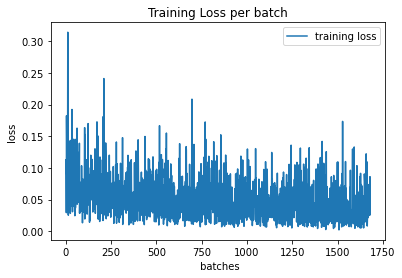

In [27]:
df_b = pd.DataFrame()
temp = []
for i in range(10):
    bb = vgg11['batch_loss_vgg11bnlr001'][i]
    temp += bb
#for bb in vgg11['batch_loss_vgg11bnlr001'][10]:
#    temp += bb
df_b["training loss"] = temp

df.plot()
plt.xlabel(" batches")
plt.ylabel("loss")
plt.title("Training Loss per batch")
plt.show()

<AxesSubplot:>

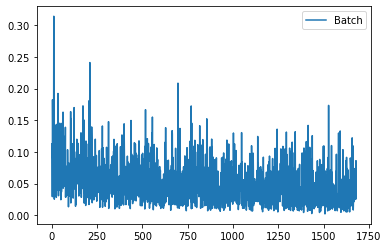

In [68]:
df_batch = pd.DataFrame()
temp = []
for i in range(10):
    bb = vgg11['batch_loss_vgg11bnlr001'][i]
    temp += bb
df_batch["Batch"] = temp

df_batch.plot()


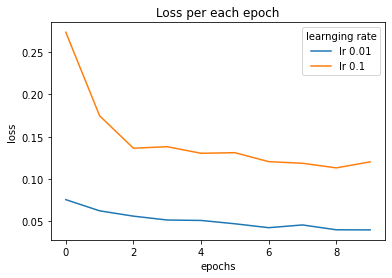

In [25]:
#Learning Rate
df = pd.DataFrame()
temp = []
for i in range(10):
    bb = vgg11['batch_loss_vgg11bnlr001'][i]
    temp.append(np.asarray(bb).mean())
df["lr 0.01"] = temp
temp = []
for bb in vgglr01['batch_loss_vgg11bn']:
      temp.append(np.asarray(bb).mean())
df["lr 0.1"] = temp

df.plot()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(title='learnging rate')
plt.title("Loss per each epoch")
plt.show()

<AxesSubplot:>

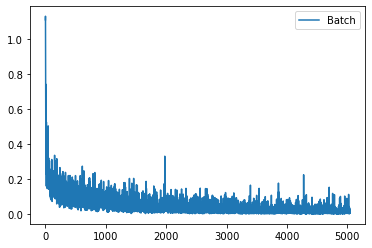

In [8]:
#Resnet batch
res50 = torch.load('data_for_report/resnet50_2.pt')
res_batch = pd.DataFrame()
temp = []
for bb in res50['res50_bloss']:
    temp += bb
res_batch["Batch"] = temp

res_batch.plot()

In [69]:
df = pd.DataFrame()
temp2 = []
for i in range(10):
    bb = vgg11['batch_loss_vgg11bnlr001'][i]
    temp2.append(np.asarray(bb).mean())
for bb in vgg11['batch_loss_vgg11bnlr001'][10]:
    temp2.append(np.asarray(bb).mean())
df["Train loss"] = temp2
df["Val loss"] = val_loss

0.0486

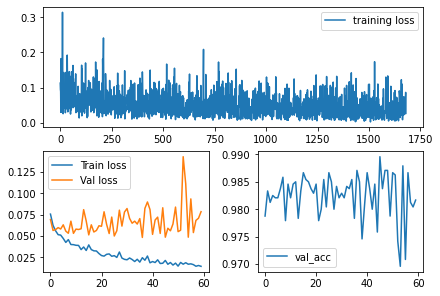

In [70]:
acc=[]
for i in range(10):
    acc += [vgg11['val_vgg11bnlr001'][i]]
acc += vgg11['val_vgg11bnlr001'][10]
df_acc = pd.DataFrame()
df_acc["val_acc"] = acc
fig, axes = plt.subplot_mosaic([['up', 'up'],
                               ['left', 'right']],constrained_layout=True)
df_acc.plot(ax = axes['right'])

df_b.plot(ax = axes['up'])
df.plot(ax=axes['left'])
#ax2.plot(range(60), temp2)
#ax1.set_title('Training loss per epochs')
np.argmax(acc)
val_loss[45]

<AxesSubplot:label='left'>

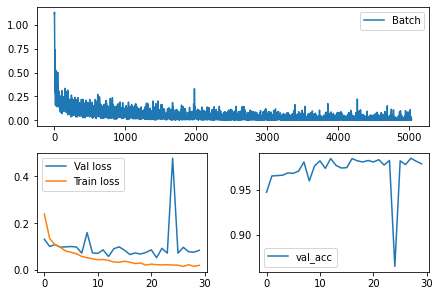

In [65]:
#Resnet result
res_epoch = pd.DataFrame()
temp = []
for bb in res50['res50_valloss']:
    temp.append(np.asarray(bb).mean())
res_epoch["Val loss"] = temp
temp = []
for bb in res50['res50_bloss']:
    temp.append(np.asarray(bb).mean())
res_epoch["Train loss"] = temp
acc=[]
for bb in res50['res50_valacc']:
    acc.append(np.asarray(bb).mean())
res_acc = pd.DataFrame()
res_acc["val_acc"] = acc

fig, axes = plt.subplot_mosaic([['up', 'up'],
                               ['left', 'right']],constrained_layout=True)
res_batch.plot(ax = axes['up'])
res_acc.plot(ax = axes['right'])
res_epoch.plot(ax=axes['left'])
#ax2.plot(range(60), temp2)
#ax1.set_title('Training loss per epochs')


<AxesSubplot:>

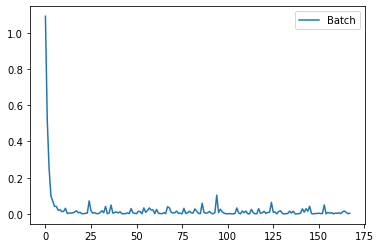

In [67]:
#Ensemble Batch
esb = torch.load('data_for_report/esb_vggres.pt')
esb_batch = pd.DataFrame()
temp = esb['esb_vggres_bloss'][0]
#for bb in esb['esb_vggres_bloss']:
#    temp += bb
esb_batch["Batch"] = temp
esb_epoch = pd.DataFrame()
temp = []


esb_batch.plot()


<AxesSubplot:>

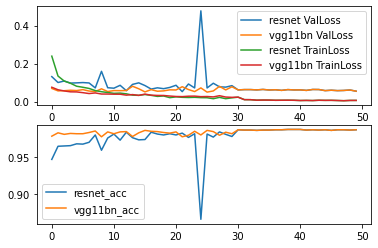

In [62]:
#Combined result
combined = pd.DataFrame()
vggbatch = []
for i in range(10):
    bb = vgg11['batch_loss_vgg11bnlr001'][i]
    vggbatch.append(np.asarray(bb).mean())
for bb in vgg11['batch_loss_vgg11bnlr001'][10]:
    vggbatch.append(np.asarray(bb).mean())

resbatch = []
for bb in res50['res50_bloss']:
    resbatch.append(np.asarray(bb).mean())

resval = []
for bb in res50['res50_valloss']:
    resval.append(np.asarray(bb).mean())



esb_batch = pd.DataFrame()
temp = esb['esb_vggres_bloss'][0]
esb_batch["Batch"] = temp
esb_epoch = pd.DataFrame()
esbval = []
for bb in esb['esb_vggres_valloss']:
    esbval.append(np.asarray(bb).mean())
esbtrain = []
for bb in esb['esb_vggres_bloss']:
    esbtrain.append(np.asarray(bb).mean())
    
combined['resnet ValLoss'] = resval+esbval
combined['vgg11bn ValLoss'] = val_loss[:30] + esbval
combined['resnet TrainLoss'] = resbatch + esbtrain
combined['vgg11bn TrainLoss'] = vggbatch[:30] + esbtrain


acc_combined = pd.DataFrame()
resacc=[]
for bb in res50['res50_valacc']:
    resacc.append(np.asarray(bb).mean())
esbacc=[]
for bb in esb['esb_vggres_valacc']:
    esbacc.append(np.asarray(bb).mean())
vggacc=[]
for i in range(10):
    vggacc += [vgg11['val_vgg11bnlr001'][i]]
vggacc += vgg11['val_vgg11bnlr001'][10]


acc_combined["resnet_acc"] = resacc  + esbacc
acc_combined["vgg11bn_acc"] = vggacc[:30]  + esbacc

fig, axes =plt.subplots(2)

combined.plot(ax=axes[0])
acc_combined.plot(ax=axes[1])

